In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [2]:
def evaluate_model(y_test, forecast):
    RMSE = np.sqrt(mean_squared_error(y_test, forecast))
    MAE = mean_absolute_error(y_test, forecast)
    r2 = r2_score(y_test, forecast)
    return (MAE, RMSE, r2)

def clean_df(df):
    for i in df:
        if df[i].isnull().all():
            df = df.drop(i, axis=1)
    return df

In [3]:
df = pd.read_excel(r'dataset.xlsx', sheet_name='dataset')
df.insert(0, 'T', range(1, 1 + len(df)))
df = clean_df(df)
df = df.dropna()

In [4]:
df_to_predict = pd.read_excel(r'dataset.xlsx', sheet_name='predict')
last_month = df['T'].iloc[-1]
df_to_predict.insert(0, 'T', range(last_month+1, last_month + 1 + len(df_to_predict)))
df_to_predict = clean_df(df_to_predict)
df_to_predict = df_to_predict.dropna()
df_to_predict = df_to_predict.drop('DateTime', axis=1)

<Axes: >

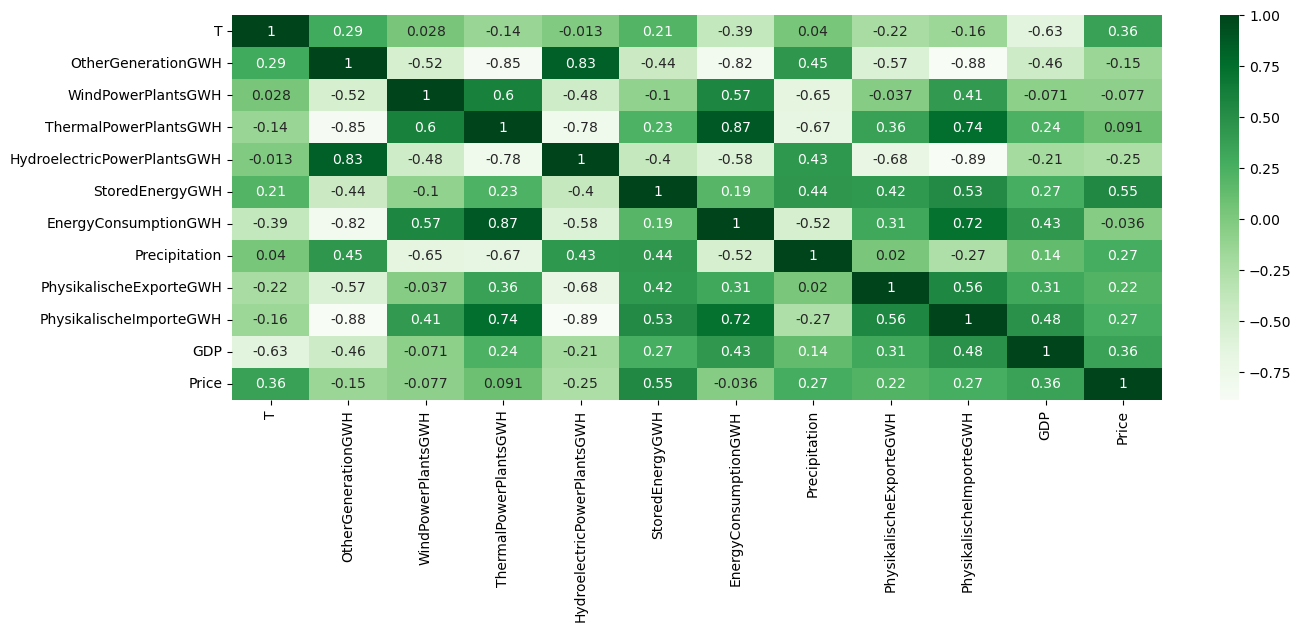

In [5]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [6]:
# models
model_rf = RandomForestRegressor()
model_ls = Lasso()
model_en = ElasticNet()
model_xg = XGBRegressor()
model_lr = LinearRegression()
model_sv = LinearSVR()
model_sg = SGDRegressor()
model_dt = DecisionTreeRegressor()
model_et = ExtraTreesRegressor()

models = {'Random Forest': model_rf,
          'Lasso': model_ls,
          'Elastic Net': model_en,
          'XGB Regressor': model_xg,
          'Linear Regression': model_lr,
          'Linear SVR': model_sv,
          'SGD Regressor': model_sg,
          'Decision Tree': model_dt,
          'Extra Tree Regressor': model_et
         }

y = df['Price']
X = df.drop(['Price', 'DateTime'], axis=1)

In [7]:
# choosing the model

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

aux = -1
for model_name, model in models.items():
    model.fit(X_train, y_train)
    forecast = model.predict(X_test)
    MAE, RMSE, r2 = evaluate_model(y_test, forecast)
    if r2 > aux:
        chosen_model = model
        aux = r2
        modelName = model_name
        predicted = model.predict(df_to_predict)

c:\Users\Pichau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.125e+04, tolerance: 3.292e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Pichau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.027e+04, tolerance: 3.292e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Pichau\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


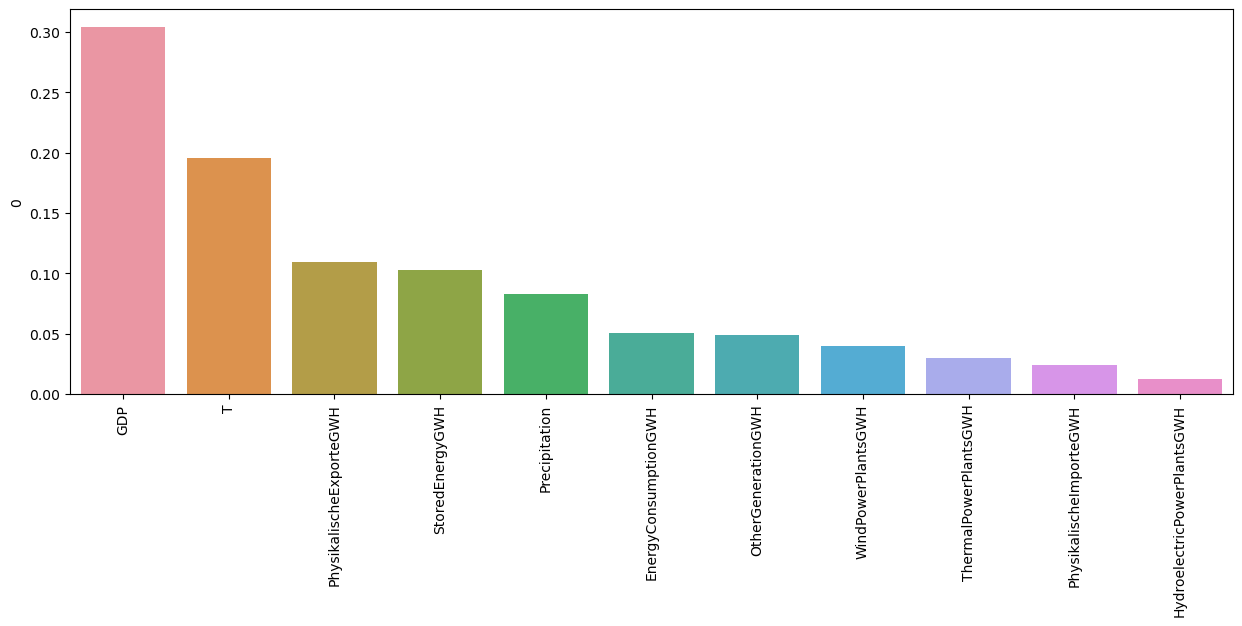

In [8]:
featureImportances = pd.DataFrame(chosen_model.feature_importances_, X_train.columns).sort_values(by=0, ascending=False)
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=featureImportances.index, y=featureImportances[0])
ax.tick_params(axis='x', rotation=90)

In [9]:
# output

df_ans = pd.read_excel(r'dataset.xlsx', sheet_name='predict')
df_ans1 = pd.read_excel(r'dataset.xlsx', sheet_name='dataset')
df_ans['Price'] = predicted
df_ans = pd.concat([df_ans1, df_ans])
df_ans = df_ans.reset_index(drop=True)
df_ans.to_csv('df_ans.csv', index=False, sep=';')